# Examples of what pyApproxTools can currently do

There is a select but ever-expanding class of problems that can be tackled by pyApproxTools. Here are some examples.

First we start with the possibility to represent exact functions on the unit-interval, $[0,1]$. In this case we use the inner-product of the Sobolev space $H_0^1([0,1])$.

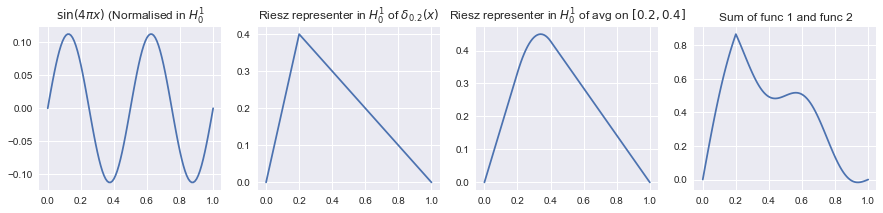

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyApproxTools as pat

# Build a bunch of functions
f1 = pat.FuncVector(params=[[4]], coeffs=[[1]], funcs=['H1UISin'])
f2 = pat.FuncVector(params=[[0.2]], coeffs=[[1]], funcs=['H1UIDelta'])
f3 = pat.FuncVector(params=[[(0.2, 0.4)]], coeffs=[[1]], funcs=['H1UIAvg'])
# Note that all algebraeic expressions are allowed on the functions
f4 = f1 + 2*f2

# We can plot them using .evaluate(x)
xs = np.arange(0.0, 1.01, 0.01)
fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(1, 4, 1, title='$\sin(4 \pi x)$ (Normalised in $H_0^1$')
ax.plot(xs, f1.evaluate(xs))
ax = fig.add_subplot(1, 4, 2, title='Riesz representer in $H_0^1$ of $\delta_{0.2}(x)$')
ax.plot(xs, f2.evaluate(xs))
ax = fig.add_subplot(1, 4, 3, title='Riesz representer in $H_0^1$ of avg on $[0.2,0.4]$')
ax.plot(xs, f3.evaluate(xs))
ax = fig.add_subplot(1, 4, 4, title='Sum of func 1 and func 2')
ax.plot(xs, f4.evaluate(xs))
plt.show()

### The library can create a basis of functions, then use it to perform projections
For example in the following we create a linear interpolation of a function by projecting it to a basis of delta functionals centered at random points.

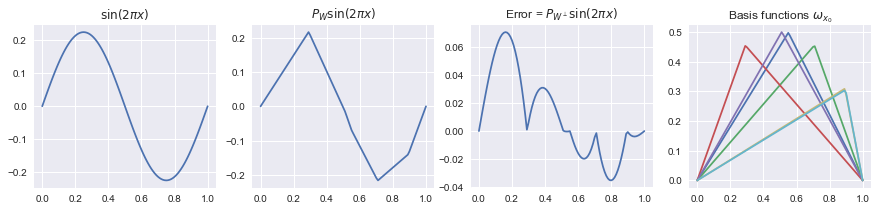

In [16]:
np.random.seed(3)

# First create the collection of delta functionals representers at 8 random points
n = 6
points = np.random.random(n)
vecs = []
for i in range(n):
    vecs.append(pat.FuncVector(params=[[points[i]]], coeffs=[[1.0]], funcs=['H1UIDelta']))

# Create the Basis class, instantiated with the function vectors
W = pat.Basis(vecs)

# Create the function we wish to project / approximate
v = pat.FuncVector(params=[[2]],coeffs=[[1]],funcs=['H1UISin'])

# And project! Easy as that. v_W is the projected vector
v_W = W.project(v)


xs = np.arange(0.0, 1.01, 0.01)
fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(1, 4, 1, title='$\sin(2 \pi x)$')
plt.plot(xs, v.evaluate(xs))
ax = fig.add_subplot(1, 4, 2, title='$P_W \sin(2 \pi x)$')
plt.plot(xs, v_W.evaluate(xs))
ax = fig.add_subplot(1, 4, 3, title='Error = $P_{W^\perp} \sin(2 \pi x)$')
plt.plot(xs, (v - v_W).evaluate(xs))
ax = fig.add_subplot(1, 4, 4, title='Basis functions $\omega_{x_0}$')
for vec in vecs:
    plt.plot(xs, vec.evaluate(xs))
plt.show()

### More intricate operations like the Maday-Patera reconstruction algorithms are available
Say we have two spaces, an "approximation" space $V_n$ and a "measurement" space $W_m$, and we measure the state of some function $u$ in $W_m$, with $P_{W_m}u = w$, then what is the closest point in $V_n$ to $w + W_m^\perp$? The algorithm provides this answer.

In [ ]:
n = 10
m = 20

phis = []
for i in range(n):
    phis.append(pat.FuncVector(params=[[i+1]],coeffs=[[1]],funcs=['H1UISin']))
V_n = pat.Basis(phis)

omegas = []
points = np.random.random(m)
for k in range(m):
    omegas.append(pat.FuncVector(params=[[points[i]]], coeffs=[[1.0]], funcs=['H1UIDelta']))
W_m = pat.Basis(omegas)
